In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from pathlib import Path

In [2]:
# Function for adapting brightness of the image
def adjust_brightness(image, target_brightness):
    current_brightness = np.mean(image) # Average brightness of the passed image

    brightness_factor = (target_brightness) / current_brightness # Scale factor to adapt brightness

    adjusted_image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8) 
    return adjusted_image

In [ ]:
#def process_img_brightness(pulite_path, perdite_path, vergine_path):
def process_img_brightness(folder_path,images_filenames):
    target_brightness = 0
    img_brightness_list = [] # List of images brightness
    images_gray_scale = [] # List of resized images 

    for image_file in images_filenames:
        img = cv2.resize(cv2.imread(os.path.join(folder_path, Path(image_file)), cv2.IMREAD_GRAYSCALE), (256,256)) # Resized image 
        img_brightness_list.append(np.mean(img)) 
        images_gray_scale.append(img) 
        print(f"Luminosità media immagine: {np.mean(img)}")
    
    # If brightness too low, target brightness is the maximum
    if(max(img_brightness_list) < 20.0): 
        target_brightness = max(img_brightness_list)
    else:
        target_brightness = min(img_brightness_list)

    adjusted_images = []
    # Adapting target brightness to all the other images
    for image in images_gray_scale:
        adjusted_img = adjust_brightness(image, target_brightness)
        adjusted_images.append(adjusted_img) 
        print(f"Luminosità media immagine adjusted: {np.mean(adjusted_img)}")
    
    #SHOW DIFF ORIGINAL-ADJUSTED IMAGES ################################################################################################
    '''if(len(images_gray_scale) < 3):
        return None
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes_index = 0
    for img_gray_scale,img_filename in zip(images_gray_scale,images_filenames):
        axes[axes_index].imshow(img_gray_scale, cmap='gray')
        axes[axes_index].set_title("Original Image: "+os.path.basename(img_filename))
        axes[axes_index].axis("off")
        axes_index += 1

    fig1, axes1 = plt.subplots(1, 3, figsize=(20, 5))
    axes_index = 0
    for adjusted_img,img_filename in zip(adjusted_images,images_filenames):
        axes1[axes_index].imshow(adjusted_img, cmap='gray') # 
        axes1[axes_index].set_title("Adjusted Image: "+os.path.basename(img_filename))
        axes1[axes_index].axis("off")
        axes_index += 1

    plt.show()'''
    return adjusted_images

In [4]:
# Applying filters and mask to the passed image 
def process_and_display_image(image_path, image):
    ddepth = cv2.CV_16S
    kernel_size = 3
    
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    image_clahe = clahe.apply(image)

    #equalized_image = cv2.equalizeHist(image)

    blurred = cv2.GaussianBlur(image, (5,5), 0)  # Apply Gaussian Blur
    laplacian = cv2.Laplacian(blurred, ddepth, ksize=kernel_size)  # Apply Laplacian filter
    abs_laplacian = cv2.convertScaleAbs(laplacian)
    
    threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    #adapt_threshold = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    lwr = np.array([200]) # Minimum value of the mask
    upp = np.array([255]) # Maximum value of the mask
    image_mask = cv2.inRange(image, lwr, upp)
    blurred_mask1 = cv2.inRange(blurred, lwr, upp)
    image_clahe = cv2.inRange(image_clahe, lwr, upp)

    # Display images
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(blurred_mask1, cmap='gray')
    axes[1].set_title("Blurred_mask")
    axes[1].axis("off")

    axes[2].imshow(image_mask, cmap='gray')
    axes[2].set_title("image_mask")
    axes[2].axis("off")

    axes[3].imshow(image_clahe, cmap='gray')
    axes[3].set_title("Image_clahe")
    axes[3].axis("off")

    plt.suptitle(os.path.basename(image_path))
    plt.show()

    return image_mask

Luminosità media immagine: 69.46711730957031
Luminosità media immagine: 60.97589111328125
Luminosità media immagine: 99.74589538574219
Luminosità media immagine adjusted: 60.472442626953125
Luminosità media immagine adjusted: 60.97589111328125
Luminosità media immagine adjusted: 60.47593688964844


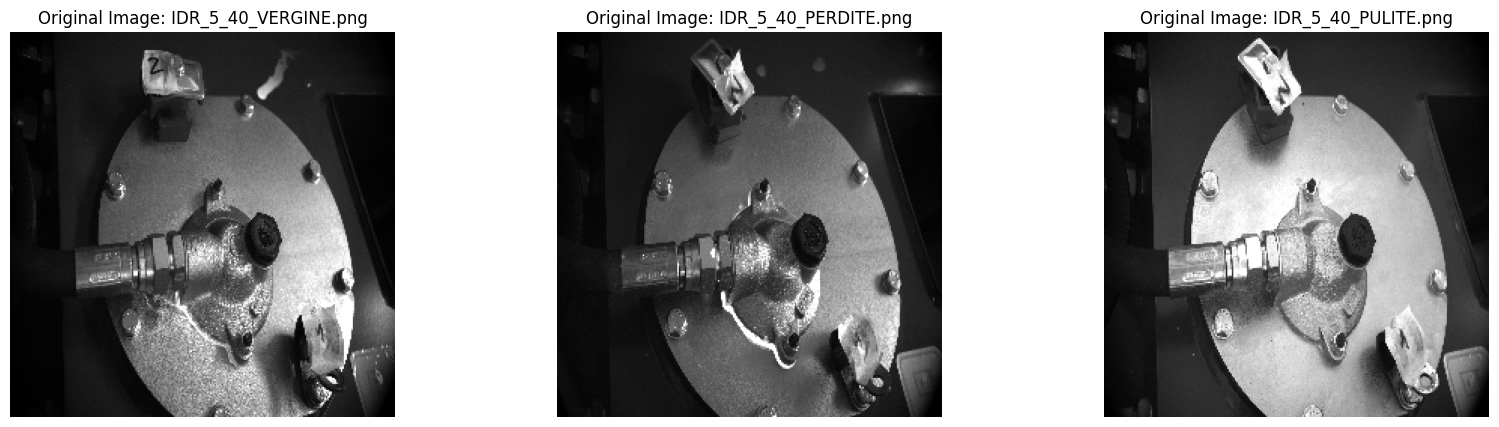

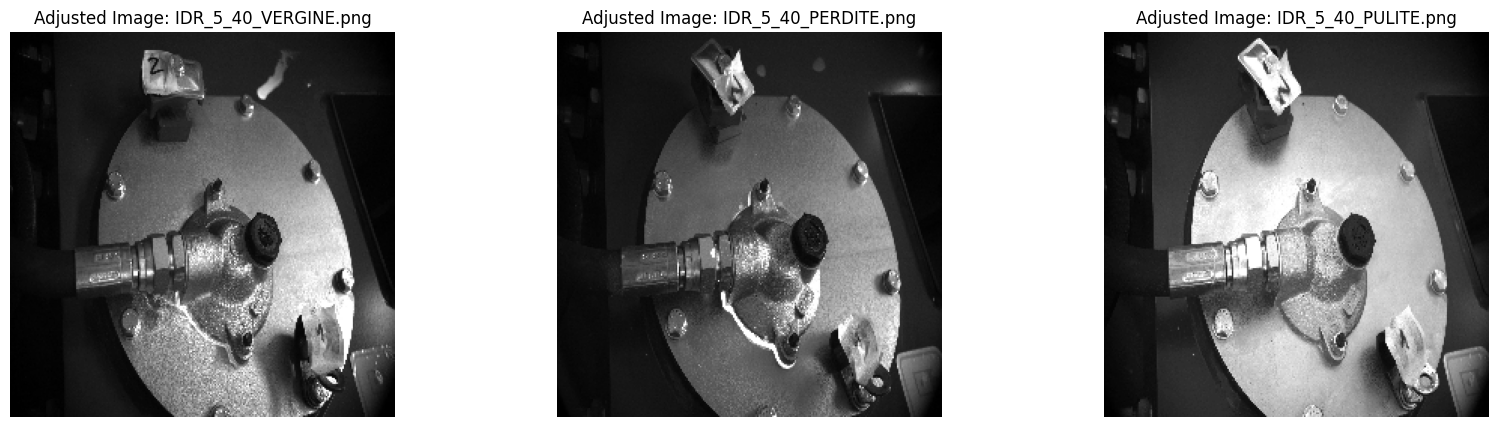

'adjusted_img_pulite, adjusted_img_perdite, adjusted_img_vergine = process_img_brightness(pulite_path, perdite_path, vergine_path)\nadjusted_img_pulite_red, adjusted_img_perdite_red, adjusted_img_vergine_red = process_img_brightness(pulite_path_red, perdite_path_red, vergine_path_red)\n\nprocess_and_display_image(pulite_path, adjusted_img_pulite)\nprocess_and_display_image(perdite_path, adjusted_img_perdite)\nprocess_and_display_image(vergine_path, adjusted_img_vergine)\n\nprocess_and_display_image(pulite_path_red, adjusted_img_pulite_red)\nprocess_and_display_image(perdite_path_red, adjusted_img_perdite_red)\nprocess_and_display_image(vergine_path_red, adjusted_img_vergine_red)'

In [5]:
# Carica le due immagini (modifica i percorsi dei file)
'''img_pulite = cv2.imread('drive/MyDrive/Lavoro/Progetti/SHED/datasetSuddiviso/UV50/PULITE.png', cv2.IMREAD_GRAYSCALE)
img_perdite = cv2.imread('drive/MyDrive/Lavoro/Progetti/SHED/datasetSuddiviso/UV50/PERDITE.png', cv2.IMREAD_GRAYSCALE)''' # TODO CAMBIATO

'''pulite_path = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddiviso/UVG40/UVG40_PULITE.png')
perdite_path = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddiviso/UVG40/UVG40_PERDITE.png')
vergine_path = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddiviso/UVG40/UVG40_VERGINE.png')

pulite_path_red = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddivisoUvRed/UVR30/UVR30_PULITE.png')
perdite_path_red = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddivisoUvRed/UVR30/UVR30_PERDITE.png')
vergine_path_red = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddivisoUvRed/UVR30/UVR30_VERGINE.png')'''

def main():
        folder_path = "prova/"
        if not (os.path.exists(folder_path)): 
                print("Specified folder does not exist.")
                return None
        subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

        for subfolder in subfolders:
                subfolder_path = os.path.join(folder_path,subfolder)
                image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('png', 'tiff'))]
                if image_files:
                        adjusted_images = process_img_brightness(subfolder_path,image_files) # Function to adjust brightness of each image

main()
'''adjusted_img_pulite, adjusted_img_perdite, adjusted_img_vergine = process_img_brightness(pulite_path, perdite_path, vergine_path)
adjusted_img_pulite_red, adjusted_img_perdite_red, adjusted_img_vergine_red = process_img_brightness(pulite_path_red, perdite_path_red, vergine_path_red)

process_and_display_image(pulite_path, adjusted_img_pulite)
process_and_display_image(perdite_path, adjusted_img_perdite)
process_and_display_image(vergine_path, adjusted_img_vergine)

process_and_display_image(pulite_path_red, adjusted_img_pulite_red)
process_and_display_image(perdite_path_red, adjusted_img_perdite_red)
process_and_display_image(vergine_path_red, adjusted_img_vergine_red)'''